# Breakdown Time Diagnosis in Manufacturing using k-NN 

***
## K-Nearest Neighbour (KNN)

# Data Import

In [87]:
import pandas as pd
import numpy as np

all = pd.read_csv("E-ticket System Downtime Report April to July Encoded.csv")

# see some of it, their overall statistics and dimensions
display(all.head(5))
display(all.describe())
display(all.shape)


,Machine,Reason\nRemarks,Date Label,Attended\nBy,Duration\nLog >> Close/Now,Production or Process Defect?
0,13,4,0,9,0,1
1,21,4,0,9,18,1
2,64,4,0,11,13,1
3,59,0,0,11,10,0
4,67,1,0,11,9,0


,Machine,Reason\nRemarks,Date Label,Attended\nBy,Duration\nLog >> Close/Now,Production or Process Defect?
count,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000
mean,35.807462,1.391213,1.385721,14.747375,16.681150,0.321596
std,20.723047,1.459661,1.128490,6.506352,11.364589,0.467127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,10.000000,8.000000,0.000000
50%,37.000000,1.000000,1.000000,14.000000,14.000000,0.000000
75%,54.000000,3.000000,2.000000,20.000000,22.000000,1.000000
max,69.000000,4.000000,3.000000,25.000000,59.000000,1.000000


(6191, 6)

# Feature Selection

In [88]:
from sklearn.feature_selection import SelectKBest, f_classif
# select all columns except the last one (the target label)
x_check=all.iloc[:,:-1]
# set target categorical data label (sixth attribute)
y_check=all.iloc[:,5]

# select all columns except the last one (the target label)
#x_test=test.iloc[:,:-1]
# set target categorical data label (sixth attribute)
#y_test=test.iloc[:,5]

In [89]:
selector = SelectKBest(score_func = f_classif, k = 5)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(x_check, y_check)
names = x_check.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]

names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

                   Feat_names      F_Scores
1             Reason\nRemarks  37074.316304
3                Attended\nBy      0.598678
4  Duration\nLog >> Close/Now      0.530313
0                    Machine       0.268487
2                  Date Label      0.000616


In [90]:
ns_df.sort_values('F_Scores', ascending=False)

,Feat_names,F_Scores
1,Reason\nRemarks,37074.316304
3,Attended\nBy,0.598678
4,Duration\nLog >> Close/Now,0.530313
0,Machine,0.268487
2,Date Label,0.000616


# Data Cleaning

Remove null samples

In [91]:
# sum of null data based on attributes
print(all.isnull().sum())

#drop all missing values
all = all.dropna()

#new sample after cleaning
all.shape

#check data types
all.dtypes

Machine                          0
Reason\nRemarks                  0
Date Label                       0
Attended\nBy                     0
Duration\nLog >> Close/Now       0
Production or Process Defect?    0
dtype: int64


Machine                          int64
Reason\nRemarks                  int64
Date Label                       int64
Attended\nBy                     int64
Duration\nLog >> Close/Now       int64
Production or Process Defect?    int64
dtype: object

In [92]:
#Assign Column Name
colNames = ["Machine No", "Breakdown Types", "Times of Day", "Technicians on-Duty", "Breakdown Duration", "Time Class"]

#Add different formats of missing alue
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]

#read again all data
#all = pd.read_csv('my_trained_15-11-1 _predict_which_machine_as_target.csv', names=colNames, na_values = missing_value_formats, delimiter=' *, *', engine = 'python')
all = pd.read_csv('E-ticket System Downtime Report April to July Encoded.csv', names=colNames, na_values = missing_value_formats, delimiter=' *, *', engine = 'python')
                  
# see some of it, their overall statistics and dimensions
display(all.head(5))
display(all.describe())
display(all.shape)

#This data have missing value, but when we print out it didn't display any null value.
print(all.isnull().sum())

#drop all missing values
all= all.dropna()

#This data have missing value, but when we print out it didn't display any null value.
print(all.isnull().sum())

# see some of it, their overall statistics and dimensions
display(all.head(5))
display(all.describe())
display(all.shape)


,Machine No,Breakdown Types,Times of Day,Technicians on-Duty,Breakdown Duration,Time Class
0,Machine,"""Reason",None,NaN,NaN,NaN
1,"Remarks""",Date Label,"""Attended",NaN,NaN,NaN
2,"By""","""Duration",None,NaN,NaN,NaN
3,"Log >> Close/Now""",Production or Process Defect?,None,NaN,NaN,NaN
4,13,4,0,9.0,0.0,1.0


,Technicians on-Duty,Breakdown Duration,Time Class
count,6191.000000,6191.000000,6191.000000
mean,14.747375,16.681150,0.321596
std,6.506352,11.364589,0.467127
min,0.000000,0.000000,0.000000
25%,10.000000,8.000000,0.000000
50%,14.000000,14.000000,0.000000
75%,20.000000,22.000000,1.000000
max,25.000000,59.000000,1.000000


(6195, 6)

Machine No             0
Breakdown Types        0
Times of Day           3
Technicians on-Duty    4
Breakdown Duration     4
Time Class             4
dtype: int64
Machine No             0
Breakdown Types        0
Times of Day           0
Technicians on-Duty    0
Breakdown Duration     0
Time Class             0
dtype: int64


,Machine No,Breakdown Types,Times of Day,Technicians on-Duty,Breakdown Duration,Time Class
4,13,4,0,9.0,0.0,1.0
5,21,4,0,9.0,18.0,1.0
6,64,4,0,11.0,13.0,1.0
7,59,0,0,11.0,10.0,0.0
8,67,1,0,11.0,9.0,0.0


,Technicians on-Duty,Breakdown Duration,Time Class
count,6191.000000,6191.000000,6191.000000
mean,14.747375,16.681150,0.321596
std,6.506352,11.364589,0.467127
min,0.000000,0.000000,0.000000
25%,10.000000,8.000000,0.000000
50%,14.000000,14.000000,0.000000
75%,20.000000,22.000000,1.000000
max,25.000000,59.000000,1.000000


(6191, 6)

# Data Transformation

## Data Encoding

In [93]:
'''
#data already been encode berofe imported

#check data types
x_train.dtypes
x_test.dtypes

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
x_train=train.apply(LabelEncoder().fit_transform)
x_test=test.apply(LabelEncoder().fit_transform)

#check data types
x_train.dtypes
x_test.dtypes
'''

'\n#data already been encode berofe imported\n\n#check data types\nx_train.dtypes\nx_test.dtypes\n\nfrom sklearn.preprocessing import LabelEncoder\n\nlabelencoder = LabelEncoder()\nx_train=train.apply(LabelEncoder().fit_transform)\nx_test=test.apply(LabelEncoder().fit_transform)\n\n#check data types\nx_train.dtypes\nx_test.dtypes\n'

# Data Scaled

In [94]:
# add code here

from sklearn.preprocessing import MinMaxScaler

# Assuming you have your training and testing sets: train_set and test_set

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training set
scaled_data = scaler.fit_transform(all)

# Transform the testing set using the same scaler
#norm_test = scaler.transform(test)


In [95]:
# Split the data into training (70%) and testing (30%) sets
from sklearn.model_selection import train_test_split

train, test= train_test_split(scaled_data, test_size=0.3, random_state=42)
train = pd.DataFrame(train) 
test = pd.DataFrame(test) 

# Save the training and testing sets to separate CSV files
train.to_csv('train_data_0.csv', index=False)
test.to_csv('test_data_0.csv', index=False)

In [96]:
# see some of it, their overall statistics and dimensions
display(train.head(5))
display(train.describe())
display(train.shape)


# see some of it, their overall statistics and dimensions
display(test.head(5))
display(test.describe())
display(test.shape)

,0,1,2,3,4,5
0,0.985507,0.25,0.333333,0.80,0.169492,0.0
1,0.695652,0.00,1.000000,0.44,0.135593,0.0
2,0.753623,0.25,0.000000,0.40,0.372881,0.0
3,0.579710,0.00,0.666667,0.92,0.067797,0.0
4,0.565217,0.75,0.666667,0.84,0.271186,1.0


,0,1,2,3,4,5
count,4333.000000,4333.000000,4333.000000,4333.000000,4333.000000,4333.000000
mean,0.521154,0.348661,0.462651,0.593510,0.279409,0.322871
std,0.300410,0.366126,0.376167,0.258987,0.188736,0.467628
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.260870,0.000000,0.000000,0.400000,0.135593,0.000000
50%,0.536232,0.250000,0.333333,0.600000,0.237288,0.000000
75%,0.797101,0.750000,0.666667,0.800000,0.372881,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(4333, 6)

,0,1,2,3,4,5
0,0.681159,0.25,0.333333,0.48,0.305085,0.0
1,0.144928,0.75,0.666667,0.56,0.271186,1.0
2,0.043478,0.00,0.333333,0.56,0.084746,0.0
3,0.260870,1.00,1.000000,1.00,0.135593,1.0
4,1.000000,0.00,0.333333,0.44,0.169492,0.0


,0,1,2,3,4,5
count,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000
mean,0.513806,0.345802,0.460172,0.581464,0.290480,0.318622
std,0.300175,0.362166,0.376251,0.263063,0.201226,0.466068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.246377,0.000000,0.000000,0.400000,0.135593,0.000000
50%,0.521739,0.250000,0.333333,0.560000,0.237288,0.000000
75%,0.782609,0.750000,0.666667,0.800000,0.389831,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(1858, 6)

In [97]:
# select all columns except the last one (the target label)
x_train=train.iloc[:,:-1]
# set target categorical data label (sixth attribute)
y_train=train.iloc[:,5]
# select all columns except the last one (the target label)

x_test=test.iloc[:,:-1]
# set target categorical data label (sixth attribute)
y_test=test.iloc[:,5]
#Use line below if want to split data into training and testing
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

print('-------- x axis test ----------')
print(x_test)
print('-------- x axis train ---------')
print(x_train)
print('-------- y axis test ----------')
print(y_test)
print('-------- y axis train ---------')
print(y_train)
print('*******************************')

-------- x axis test ----------
             0     1         2     3         4
0     0.681159  0.25  0.333333  0.48  0.305085
1     0.144928  0.75  0.666667  0.56  0.271186
2     0.043478  0.00  0.333333  0.56  0.084746
3     0.260870  1.00  1.000000  1.00  0.135593
4     1.000000  0.00  0.333333  0.44  0.169492
...        ...   ...       ...   ...       ...
1853  0.724638  0.75  0.666667  0.48  0.237288
1854  0.594203  0.25  0.000000  0.92  0.254237
1855  0.898551  0.75  0.333333  0.72  0.220339
1856  0.072464  0.00  1.000000  0.60  0.271186
1857  0.681159  0.00  0.333333  0.84  0.491525

[1858 rows x 5 columns]
-------- x axis train ---------
             0     1         2     3         4
0     0.985507  0.25  0.333333  0.80  0.169492
1     0.695652  0.00  1.000000  0.44  0.135593
2     0.753623  0.25  0.000000  0.40  0.372881
3     0.579710  0.00  0.666667  0.92  0.067797
4     0.565217  0.75  0.666667  0.84  0.271186
...        ...   ...       ...   ...       ...
4328  0.492754  0.

# Build kNN model and fit data into

In [102]:
# import KNN model as 'KNeighborsClassifier'
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd

#Define k-value
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

#Estimate the accuracy of the classifier on test data
y_pred=knn.predict(x_test)
score = metrics.accuracy_score(y_test,y_pred)
score

0.9989235737351991

 code for application of KNN with specific parameters

# Plot Graph for K values

The optimal number of neighbors is 1
The optimal score is 1.00


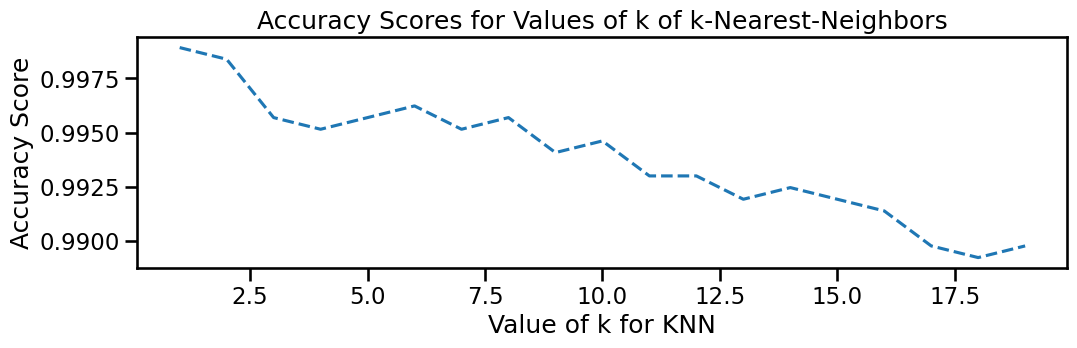

In [103]:
import matplotlib.pyplot as plt # library for plotting
import warnings # to hide unnecesary warning
warnings.filterwarnings('ignore')
# line required for inline charts/plots
%matplotlib inline

# empty variable for storing the KNN metrics
scores=[]

# We try different values of k for the KNN (from k=1 up to k=20)
lrange=list(range(1,20))

# loop the KNN process
for k in lrange:
    # input the k value and 'distance' measure
    knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')
    # input the train data to train KNN
    knn.fit(x_train,y_train)
    # see KNN prediction by inputting the test data
    y_pred=knn.predict(x_test)
    # append the performance metric (accuracy)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    optimal_k = lrange[scores.index(max(scores))]
          
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))
plt.figure(2,figsize=(12,3))
    
# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

Understanding Accuracy Scores for Different 'k' Values:
Effect of 'k' on Model Complexity: As you change the 'k' value in KNN, you alter the model's complexity. Lower values of 'k' (e.g., 1, 3) result in a more complex model, potentially capturing noise in the data, leading to overfitting. Higher values of 'k' (e.g., 10, 20) tend to generalize more but might overlook local patterns, potentially resulting in underfitting.

Accuracy Scores: The accuracy scores associated with different 'k' values indicate how well the model generalized to the test data at each 'k'. Higher accuracy scores suggest better performance, but the best 'k' value might vary depending on the dataset.

Selecting an Optimal 'k': Typically, you'd aim to find the 'k' value that provides the best balance between bias and variance, where the model neither overfits nor underfits. This is often done through techniques like cross-validation, where different 'k' values are tested on various subsets of the data to find the most suitable one.

Interpreting the Scores:
Increase then Decrease: Accuracy scores might initially increase as 'k' grows from a very small value because a more general model might fit the data better. However, after reaching an optimal point, increasing 'k' further might result in decreased accuracy due to oversmoothing or loss of important local information.

Visual Inspection: Sometimes, plotting a graph of 'k' values against accuracy scores (a "validation curve") can help visualize the trend and identify the 'k' value that yields the best performance.

The interpretation of accuracy scores for different 'k' values in KNN helps in selecting an appropriate 'k' that achieves the best trade-off between bias and variance, leading to a model that generalizes well to new, unseen data.







# Performance Analysis

The prediction accuracy is: 98.98%


Text(0.5, 20.083333333333314, 'Predicted label')

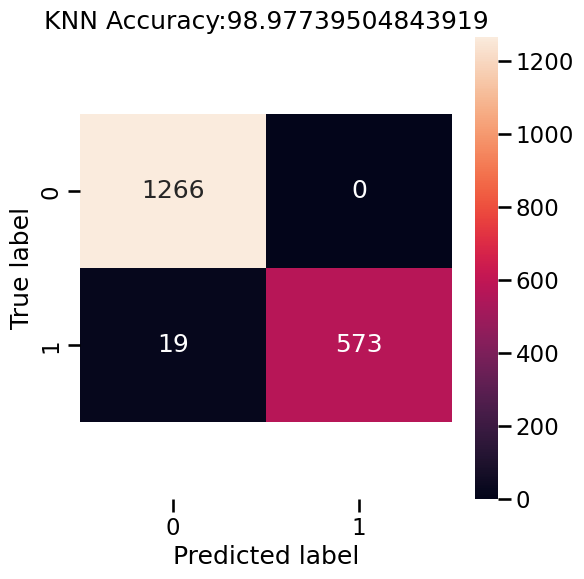

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns

# predict the classes of new, unseen data
predict = knn.predict(x_test)

print("The prediction accuracy is: {0:2.2f}{1:s}".format(knn.score(x_test,y_test)*100,"%"))
# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)


# Transform to dataframe for easier plotting
#index and columns based on target, predict
#cm_df = pd.DataFrame(cm, index = ['0','1', '2','3','4','5'], 
                   #  columns = ['0','1', '2','3','4','5'])
cm_df = pd.DataFrame(cm, index = ['0','1'], 
                     columns = ['0','1'])

# plot the confusion matrix
plt.figure(figsize=(6,6))
ax= sns.heatmap(cm_df, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title("KNN Accuracy:" + str(knn.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [108]:
from sklearn.metrics import classification_report

# Assuming you have trained KNN and obtained predictions
# Replace y_pred and y_true with your predicted and true labels

# Calculate precision, recall, F1-score, and support
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1266
         1.0       1.00      0.97      0.98       592

    accuracy                           0.99      1858
   macro avg       0.99      0.98      0.99      1858
weighted avg       0.99      0.99      0.99      1858



In [ ]:
The accuracy is so high because target(Defect Type) based on features 'Breakdown Type'


# ROC plot

In [115]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Getting predicted probabilities for the positive class (class 1)
y_probs = knn.predict_proba(x_test)[:, 1]

# Calculating ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)


print(roc_auc)
print(fpr, tpr, thresholds)

1.0
[0.         0.         0.         0.         0.02053712 1.        ] [0.         0.91385135 0.99662162 1.         1.         1.        ] [       inf 1.         0.25916423 0.17916144 0.02071907 0.        ]
